In [2]:
# Dataframe
import pandas as pd

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Regular Expressions
import re

# Maptplolib
import matplotlib.pyplot as plt 

#Numpy
import numpy as np 

# Seaborn
import seaborn as sns 

# Scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import nltk
nltk.download('stopwords')

import os
#from google.colab import drive
#from google.colab import files

np.set_printoptions(suppress=True)  # no usar notacion "e"

# Librerias para Analisis y optimizacion de los parametros
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Liberias para calcular las metricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import pairwise_distances_argmin_min
#custering
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.mixture import GaussianMixture


import itertools
import warnings
warnings.filterwarnings("ignore")
import io



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blkhwk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#cargar el dataset
#upload = files.upload()

# load dataset

news_df = pd.read_csv("C:/Users/blkhwk/Desktop/Mentoria_Datasets/news_dataset.csv")
news_df.head()

id ticker                                              title category  \
0  221515    NIO  Why Shares of Chinese Electric Car Maker NIO A...     news   
1  221516    NIO  NIO only consumer gainer  Workhorse Group amon...     news   
2  221517    NIO  NIO leads consumer gainers  Beyond Meat and Ma...     news   
3  221518    NIO                  NIO  NVAX among premarket gainers     news   
4  221519    NIO                  PLUG  NIO among premarket gainers     news   

                                             content release_date  \
0  What s happening\nShares of Chinese electric c...   2020-01-15   
1  Gainers  NIO  NYSE NIO   7  \nLosers  MGP Ingr...   2020-01-18   
2  Gainers  NIO  NYSE NIO   14   Village Farms In...   2020-01-15   
3  Cemtrex  NASDAQ CETX   85  after FY results \n...   2020-01-15   
4  aTyr Pharma  NASDAQ LIFE   63  on Kyorin Pharm...   2020-01-06   

          provider                                                url  \
0  The Motley Fool                             https://invst.ly/pigqi   
1    Seeking Alpha                             https://invst.ly/pje9c   
2    Seeking Alpha                             https://invst.ly/pifmv   
3    Seeking Alpha                             https://invst.ly/picu8   
4    Seeking Alpha  https://seekingalpha.com/news/3529772-plug-nio...   

   article_id  
0     2060327  
1     2062196  
2     2060249  
3     2060039  
4     2053096

In [ ]:

# # Alternativa google drive
# # Declaramos la ruta principal
# google_drive = "/content/gdrive"
# root_path = os.path.join(google_drive, "My Drive", "Colab Notebooks", "Mentoria_Datasets")

In [ ]:
# drive.mount(google_drive, force_remount = True)

In [5]:
# Check for nulll values
news_df.isnull().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [6]:
# Shape of our dataset
news_df.shape

(221513, 9)

In [7]:
df_copy = news_df.copy()
df_copy.head()

id ticker                                              title category  \
0  221515    NIO  Why Shares of Chinese Electric Car Maker NIO A...     news   
1  221516    NIO  NIO only consumer gainer  Workhorse Group amon...     news   
2  221517    NIO  NIO leads consumer gainers  Beyond Meat and Ma...     news   
3  221518    NIO                  NIO  NVAX among premarket gainers     news   
4  221519    NIO                  PLUG  NIO among premarket gainers     news   

                                             content release_date  \
0  What s happening\nShares of Chinese electric c...   2020-01-15   
1  Gainers  NIO  NYSE NIO   7  \nLosers  MGP Ingr...   2020-01-18   
2  Gainers  NIO  NYSE NIO   14   Village Farms In...   2020-01-15   
3  Cemtrex  NASDAQ CETX   85  after FY results \n...   2020-01-15   
4  aTyr Pharma  NASDAQ LIFE   63  on Kyorin Pharm...   2020-01-06   

          provider                                                url  \
0  The Motley Fool                             https://invst.ly/pigqi   
1    Seeking Alpha                             https://invst.ly/pje9c   
2    Seeking Alpha                             https://invst.ly/pifmv   
3    Seeking Alpha                             https://invst.ly/picu8   
4    Seeking Alpha  https://seekingalpha.com/news/3529772-plug-nio...   

   article_id  
0     2060327  
1     2062196  
2     2060249  
3     2060039  
4     2053096

In [59]:
df_copy = news_df.sample(frac=0.1). reset_index()
df_copy.head()

index      id ticker                                              title  \
0   86623  308138   NFLX              Netflix s Mobile Only Plan Is Working   
1   39254  260769    DIS  What s The Deal  Investors Could Learn Lesson ...   
2  106793  328308   CACC  Credit Acceptance Corp  CACC  Q4 2019 Earnings...   
3  135037  356552  GOOGL  Google crunches data to help NASA find two new...   
4  218318  439834    WFC  Wells Fargo receives final approval to settle ...   

  category                                            content release_date  \
0     news  Netflix  NASDAQ NFLX  started testing a low pr...   2020-01-24   
1  opinion   Thursday Market Open  Sometimes the market is...   2018-08-09   
2     news  Credit Acceptance Corp  NASDAQ CACC Q4 2019 Ea...   2020-01-31   
3     news  By Paresh Dave SAN FRANCISCO  Reuters    Alpha...   2017-12-14   
4     news   Reuters     Wells Fargo   NYSE WFC    Co said...   2018-06-15   

          provider                                                url  \
0  The Motley Fool                             https://invst.ly/pmhyb   
1       JJ Kinahan  https://www.investing.com/analysis/whats-the-d...   
2  The Motley Fool                             https://invst.ly/ppdj1   
3          Reuters  https://www.investing.com/news/general-news/go...   
4          Reuters  https://www.investing.com/news/stock-market-ne...   

   article_id  
0     2067367  
1   200337664  
2     2072742  
3      994423  
4     1494686

# Map target label to String
 0 -> NEGATIVE
 2 -> NEUTRAL
 4 -> POSITIVE

In [60]:
# Map target label to String
# 0 -> NEWS
# 1 -> OPINION


def func(df):
    if df == 'news':
        return 0
    else:
        return 1
df_copy['category'] = df_copy.category.apply(func)
df_copy.head()

index      id ticker                                              title  \
0   86623  308138   NFLX              Netflix s Mobile Only Plan Is Working   
1   39254  260769    DIS  What s The Deal  Investors Could Learn Lesson ...   
2  106793  328308   CACC  Credit Acceptance Corp  CACC  Q4 2019 Earnings...   
3  135037  356552  GOOGL  Google crunches data to help NASA find two new...   
4  218318  439834    WFC  Wells Fargo receives final approval to settle ...   

   category                                            content release_date  \
0         0  Netflix  NASDAQ NFLX  started testing a low pr...   2020-01-24   
1         1   Thursday Market Open  Sometimes the market is...   2018-08-09   
2         0  Credit Acceptance Corp  NASDAQ CACC Q4 2019 Ea...   2020-01-31   
3         0  By Paresh Dave SAN FRANCISCO  Reuters    Alpha...   2017-12-14   
4         0   Reuters     Wells Fargo   NYSE WFC    Co said...   2018-06-15   

          provider                                                url  \
0  The Motley Fool                             https://invst.ly/pmhyb   
1       JJ Kinahan  https://www.investing.com/analysis/whats-the-d...   
2  The Motley Fool                             https://invst.ly/ppdj1   
3          Reuters  https://www.investing.com/news/general-news/go...   
4          Reuters  https://www.investing.com/news/stock-market-ne...   

   article_id  
0     2067367  
1   200337664  
2     2072742  
3      994423  
4     1494686

In [61]:
df_copy.shape

(22151, 10)

# Count plot for labels feature

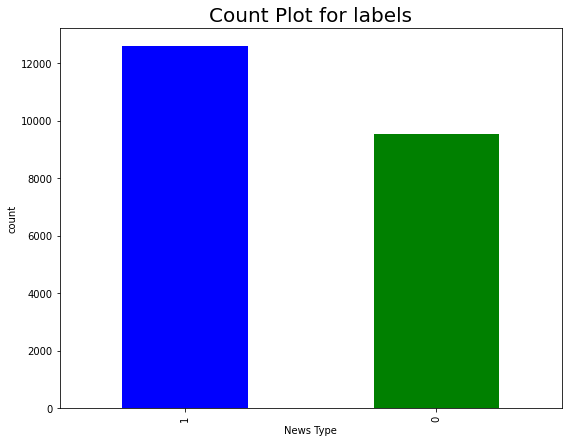

In [62]:
plt.figure(figsize=(9,7))
df_copy.category.value_counts().plot(kind='bar',color=['blue','green','red'])
plt.xlabel("News Type")
plt.ylabel("count")
plt.title("Count Plot for labels",{'fontsize':20});

# Text preprocessing

In [14]:
#SOLO USO LOS TITLES PARA CLUSTERIZAR PARA BAJAR LA CANTIDAD DE DATOS
corpous = list()

#Object for porterstem
ps = PorterStemmer()

for i in range(len(df_copy)):
    text = re.sub(r'[^a-zA-Z]',' ',df_copy.title[i])  
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpous.append(text)


APLICANDO WORD2VEC

In [15]:
import gensim
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in corpous]
x_tokenized[0]

['bank',
 'america',
 'name',
 'pauli',
 'equiti',
 'capit',
 'market',
 'head',
 'germani',
 'austria',
 'switzerland']

In [16]:
import time

start = time.time()

model = gensim.models.Word2Vec(x_tokenized)
                 # Size is the length of our vector.
                

end = round(time.time()-start,2)
print("This process took",end,"seconds.")

This process took 0.94 seconds.


In [17]:
model.wv.most_similar("total")

[('strateg', 0.9968842267990112),
 ('eagl', 0.9966485500335693),
 ('acquisit', 0.9963905215263367),
 ('western', 0.996224582195282),
 ('box', 0.9959303140640259),
 ('benefit', 0.9957520961761475),
 ('walmart', 0.9957276582717896),
 ('public', 0.9957196116447449),
 ('equinix', 0.99570232629776),
 ('union', 0.9956973791122437)]

In [18]:
class Sequencer():
    
    def __init__(self,
                 all_words,
                 max_words,
                 seq_len,
                 embedding_matrix
                ):
        
        self.seq_len = seq_len
        self.embed_matrix = embedding_matrix
        """
        temp_vocab = Vocab which has all the unique words
        self.vocab = Our last vocab which has only most used N words.
    
        """
        temp_vocab = list(set(all_words))
        self.vocab = []
        self.word_cnts = {}
        """
        Now we'll create a hash map (dict) which includes words and their occurencies
        """
        for word in temp_vocab:
            # 0 does not have a meaning, you can add the word to the list
            # or something different.
            count = len([0 for w in all_words if w == word])
            self.word_cnts[word] = count
            counts = list(self.word_cnts.values())
            indexes = list(range(len(counts)))
        
        # Now we'll sort counts and while sorting them also will sort indexes.
        # We'll use those indexes to find most used N word.
        cnt = 0
        while cnt + 1 != len(counts):
            cnt = 0
            for i in range(len(counts)-1):
                if counts[i] < counts[i+1]:
                    counts[i+1],counts[i] = counts[i],counts[i+1]
                    indexes[i],indexes[i+1] = indexes[i+1],indexes[i]
                else:
                    cnt += 1
        
        for ind in indexes[:max_words]:
            self.vocab.append(temp_vocab[ind])
                    
    def textToVector(self,text):
        # First we need to split the text into its tokens and learn the length
        # If length is shorter than the max len we'll add some spaces (100D vectors which has only zero values)
        # If it's longer than the max len we'll trim from the end.
        tokens = text.split()
        len_v = len(tokens)-1 if len(tokens) < self.seq_len else self.seq_len-1
        vec = []
        for tok in tokens[:len_v]:
            try:
                vec.append(self.embed_matrix[tok])
            except Exception as E:
                pass
        
        last_pieces = self.seq_len - len(vec)
        for i in range(last_pieces):
            vec.append(np.zeros(100,))
        
        return np.asarray(vec).flatten()
                

In [19]:
len(max(x_tokenized, key=len))

31

In [20]:
sequencer = Sequencer(all_words = [token for seq in x_tokenized for token in seq],
              max_words = 1200,
              seq_len = 33,
              embedding_matrix = model.wv
             )

In [21]:
test_vec = sequencer.textToVector("million user decemb market share number")
test_vec

array([-0.28249547,  0.42399073,  0.12648427, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
test_vec.shape

(3300,)

In [ ]:
#alternativa countvectorizer

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# X = cv.fit_transform(corpous).toarray()

In [23]:
# let's create
# vectors for our each vector
X = np.asarray([sequencer.textToVector(" ".join(seq)) for seq in x_tokenized])
print(X.shape)

(22151, 3300)


In [63]:
# Dependent Feature
y = df_copy.category


0    0
1    1
2    0
3    0
4    0
Name: category, dtype: int64

In [26]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, random_state=20).fit(X).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(sequencer.textToVector, 8)

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters


In [27]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(X) 

# Etiquetas asignadas por el algoritmo
clusters = km.labels_


In [28]:
df_clusters=df_copy.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(200)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


index      id ticker                                              title  \
0     37795  259310    BAC  Bank of America names Pauli equity capital mar...   
1     60503  282018   AAPL  Apple shares drop below  100 for first time si...   
2    112183  333698    SNE  Zacks com Featured Highlights Include  BRP  AC...   
3    202507  424023     GM  General Motors  GM  To Discontinue Vehicle Sal...   
4    207668  429184     MS  Japan s Equity Faithful Want Foreigners to Rev...   
..      ...     ...    ...                                                ...   
195  173598  395114    IBM                                       IBM Falls 4    
196   48361  269876     KO  Coca Cola  KO  Stock Sinks As Market Gains  Wh...   
197   35736  257251    BAC  BofA  BAC  Q4 Earnings Top On Trading  Underwr...   
198   26721  248236   MSFT  AI on the menu as Nokia chairman goes back to ...   
199  133035  354550    MAR  Choice Hotels Continues To Expand Brands  Eyes...   

    category                                            content release_date  \
0       news  FRANKFURT  Reuters    Bank of America  N BAC  ...   2019-07-12   
1       news   Reuters    Apple Inc  O AAPL  shares dropped ...   2016-01-06   
2    opinion  For Immediate ReleaseChicago  IL   December 3 ...   2019-12-04   
3    opinion  General Motors Company   NYSE GM   plans to st...   2017-05-18   
4       news   Bloomberg     Japanese retail investors bough...   2018-02-22   
..       ...                                                ...          ...   
195     news  Investing com    IBM   NYSE IBM  fell by 4 03 ...   2019-08-05   
196  opinion  In the latest trading session  Coca Cola  KO  ...   2019-01-09   
197  opinion  Improved trading and underwriting performance ...   2020-01-14   
198     news  HELSINKI  Reuters    He runs a company that is...   2017-10-06   
199  opinion  Choice Hotels International  Inc    NYSE CHH  ...   2019-03-24   

                      provider  \
0                      Reuters   
1                      Reuters   
2    Zacks Investment Research   
3    Zacks Investment Research   
4                    Bloomberg   
..                         ...   
195              Investing.com   
196  Zacks Investment Research   
197  Zacks Investment Research   
198                    Reuters   
199  Zacks Investment Research   

                                                   url  article_id  kmeans  
0    https://www.investing.com/news/stock-market-ne...     1922212       4  
1    https://www.investing.com/news/technology-news...      378960       4  
2    https://www.investing.com/analysis/zackscom-fe...   200490398       3  
3    https://www.investing.com/analysis/general-mot...   200190313       4  
4    https://www.investing.com/news/stock-market-ne...     1297265       4  
..                                                 ...         ...     ...  
195  https://www.investing.com/news/stock-market-ne...     1945676       0  
196  https://www.investing.com/analysis/cocacola-ko...   200374216       4  
197  https://www.investing.com/analysis/bofa-bac-q4...   200498886       1  
198  https://www.investing.com/news/technology-news...      538034       4  
199  https://www.investing.com/analysis/choice-hote...   200400717       4  

[200 rows x 11 columns]

In [29]:
labels = km.labels_
cluster_center=km.cluster_centers_

In [30]:
cluster_center

array([[-0.23787828,  0.22256614, -0.00780488, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09409175,  0.17116445,  0.06930099, ...,  0.        ,
         0.        ,  0.        ],
       [-0.70418502,  0.26284303, -0.26348041, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53259939,  0.19351067,  1.98791881, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24586801,  0.22144985,  0.00863609, ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [32]:
# which tells us that clusters are far away from each other 
silhouette_score

0.11165359240109395

In [34]:
# How many points belong to each cluster -> using group by in pandas
df_clusters.groupby(['kmeans'])['title'].count()

kmeans
0    8129
1    2375
2    1915
3     464
4    9268
Name: title, dtype: int64

In [36]:
# # #Refrence credit - to find the top 10 features of cluster centriod
# # #https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# terms = sequencer.textToVector.get_feature_names()
# for i in range(5):
#     print("Cluster %d:" % i, end='')
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind], end='')
#         print()

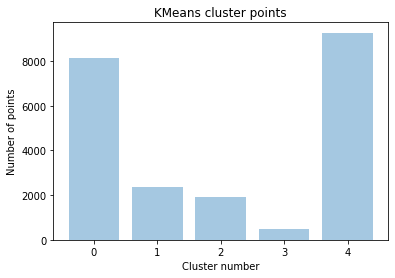

In [38]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(5)], df_clusters.groupby(['kmeans'])['title'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [40]:
# Reading a review which belong to each group.
for i in range(5):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df_clusters.iloc[df_clusters.groupby(['kmeans']).groups[i][0]]['title'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
ANALYSIS Bernanke reassures markets but doubts remain


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Barrick s  GOLD  Q1 Earnings Beat  Revenues Miss Estimates


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
U S  stocks lower at close of trade  Dow Jones Industrial Average down 1 29 


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
Zacks com Featured Highlights Include  BRP  ACM  Celsius Holdings  Sony And Deckers


______________________________________________________________________
A review o

In [41]:
# check whether the words are clustered correctly
print(km.predict(X))

[4 4 3 ... 4 1 4]


In [42]:
#Tokens más cercanos al centro, + representativos de cada cluster

# find the index and the distance of the closest points from x to each class centroid

close = pairwise_distances_argmin_min(km.cluster_centers_, X, metric='euclidean')
index_closest_points = close[0]
distance_closest_points = close[1]

for i in range(0, n_clust):
    print("The closest token to the centroid of class {0} is {1}, the distance is {2}".format(i, x_tokenized[index_closest_points[i]], distance_closest_points[i]))
    #print("The closest token to the centroid of class {0} is {1}, the distance is {2}".format(i, corpous[index_closest_points[i]], distance_closest_points[i]))

The closest token to the centroid of class 0 is ['anoth', 'friday', 'anoth', 'green', 'close'], the distance is 1.0924369049798557
The closest token to the centroid of class 1 is ['keysight', 'key', 'post', 'q', 'earn', 'surpris', 'card'], the distance is 3.662257285372985
The closest token to the centroid of class 2 is ['asia', 'stock', 'mix', 'amid', 'global', 'growth', 'woe', 'nikkei'], the distance is 3.5711543994019084
The closest token to the centroid of class 3 is ['zack', 'analyst', 'blog', 'highlight', 'pfizer', 'chevron', 'cisco', 'la', 'vega', 'sand', 'dominion', 'resourc'], the distance is 2.243625203622196
The closest token to the centroid of class 4 is ['chrysler', 'creat', 'vehicl', 'safeti', 'offic', 'put', 'veteran', 'charg'], the distance is 1.644918854805856


In [51]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_kmeans = tsne_model.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22151 samples in 0.114s...
[t-SNE] Computed neighbors for 22151 samples in 185.980s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22151
[t-SNE] Computed conditional probabilities for sample 2000 / 22151
[t-SNE] Computed conditional probabilities for sample 3000 / 22151
[t-SNE] Computed conditional probabilities for sample 4000 / 22151
[t-SNE] Computed conditional probabilities for sample 5000 / 22151
[t-SNE] Computed conditional probabilities for sample 6000 / 22151
[t-SNE] Computed conditional probabilities for sample 7000 / 22151
[t-SNE] Computed conditional probabilities for sample 8000 / 22151
[t-SNE] Computed conditional probabilities for sample 9000 / 22151
[t-SNE] Computed conditional probabilities for sample 10000 / 22151
[t-SNE] Computed conditional probabilities for sample 11000 / 22151
[t-SNE] Computed conditional probabilities for sample 12000 / 22151
[t-SNE] Computed conditional probabilities for s

In [52]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis 

output_notebook()
plot_kmeans = bp.figure(plot_width=900, plot_height=700, title="Sentiment (Word2Vec)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_kmeans.scatter(x=tsne_kmeans[:,0], y=tsne_kmeans[:,1])
                   
hover = plot_kmeans.select(dict(type=HoverTool))

show(plot_kmeans)

Loading BokehJS ...

In [66]:
colormap = np.array([
    "#1f77b4", "#ff9896", "#ffbb78" 
])

plot_kmeans = bp.figure(plot_width=800, plot_height=700, title="Sentiment (Clases)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_kmeans.scatter(x=tsne_kmeans[:,0], y=tsne_kmeans[:,1], 
                    color=colormap[y][:25000]) 
                   
hover = plot_kmeans.select(dict(type=HoverTool))

show(plot_kmeans)

En el gráfico anterior se observa la distribución clases en dos dimensiones

In [68]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

plot_kmeans = bp.figure(plot_width=800, plot_height=700, title="Sentiment (k-means)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_kmeans.scatter(x=tsne_kmeans[:,0], y=tsne_kmeans[:,1], 
                    color=colormap[clusters][:23000]) 
                   
hover = plot_kmeans.select(dict(type=HoverTool))

show(plot_kmeans)

Así quedan representados los cinco clusters obtenidos con K-Means en un espacio bidimensional graficado con TSNE. Se puede observar que los clusters no coinciden con las clases y que las clases en el espacio bidimensional no se separan espacialmente.

In [94]:
#PCA con 40 componmentes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = X  

train = StandardScaler().fit_transform(train)
train = pd.DataFrame(train).dropna()

pca = PCA(n_components=60)
pca_res = pca.fit_transform(train)
train.head(3)

0         1         2         3         4         5         6     \
0 -0.348414  0.297644 -0.077778  0.043620 -0.383187 -0.184584 -0.397277   
1  0.081373 -0.507842  0.650698  0.272700 -0.815123 -0.090814  0.483573   
2 -0.909141 -0.186695  5.457229  3.414323 -4.022485 -1.443250  4.795044   

       7         8         9     ...  3290  3291  3292  3293  3294  3295  \
0  0.344383  0.289020  0.669908  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1 -0.003796 -0.245565 -0.125744  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.909197 -4.456962 -4.960060  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   3296  3297  3298  3299  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  

[3 rows x 3300 columns]

In [118]:
pca_res

array([[ -0.17949353,  -0.15963039,  -0.28337051, ...,  -0.12129553,
         -0.70279752,   2.26768107],
       [ -0.6053332 ,   0.4636027 ,   0.20900773, ...,  -0.15255051,
         -2.89445635,   3.64101553],
       [  2.5005324 ,  -3.90655986,  -2.52043941, ...,  -0.63180001,
          2.03732177,   1.38574121],
       ...,
       [ -0.89385519,   0.95686471,   0.58051327, ...,   0.44451867,
         -1.11952174,  -1.5361821 ],
       [ -0.56894216,   0.38377792,   0.09369355, ...,   0.32668521,
         -0.37187954,   2.43074426],
       [  7.13381256, -20.42411872, -24.45962829, ...,  -4.16197673,
          1.41286171,   5.95174536]])

In [96]:
#print(pca.explained_variance_ratio_)


print(pca.explained_variance_ratio_.cumsum())

[0.21455924 0.31879155 0.39833855 0.4589704  0.49998105 0.53747584
 0.57299159 0.60386975 0.62572569 0.64521261 0.66419074 0.6792794
 0.69386559 0.70742357 0.72018707 0.73218145 0.74318148 0.75357874
 0.76353517 0.77298991 0.78217617 0.79091137 0.79872823 0.8061826
 0.81346024 0.82050654 0.82752779 0.83443665 0.84071209 0.84681239
 0.85282209 0.858644   0.86416665 0.86964393 0.87495731 0.88001622
 0.88497391 0.88961571 0.89410977 0.89838129 0.90241714 0.90626469
 0.90995969 0.91344377 0.91684536 0.92018567 0.92352077 0.92670614
 0.92974555 0.93253748 0.9352893  0.93783423 0.94031587 0.94263079
 0.9448298  0.94688475 0.94878022 0.95061887 0.95240933 0.95414048]


In [127]:
output_notebook()
plot_pca = bp.figure(plot_width=900, plot_height=700, title="PCA",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_pca.scatter(x=pca_res[:,10], y=pca_res[:,23])
                   
hover = plot_pca.select(dict(type=HoverTool))

show(plot_pca)

Loading BokehJS ...

In [119]:
text_pca= pca.transform(train)
text_pca

array([[ -0.17949353,  -0.15963039,  -0.28337051, ...,  -0.12694273,
         -0.70073732,   2.25204467],
       [ -0.6053332 ,   0.4636027 ,   0.20900773, ...,  -0.17043861,
         -2.9198561 ,   3.68604441],
       [  2.5005324 ,  -3.90655986,  -2.52043941, ...,  -0.63503341,
          2.03319382,   1.38904244],
       ...,
       [ -0.89385519,   0.95686471,   0.58051327, ...,   0.42533577,
         -1.12439072,  -1.51972129],
       [ -0.56894216,   0.38377792,   0.09369355, ...,   0.31734687,
         -0.38448541,   2.45411166],
       [  7.13381256, -20.42411872, -24.45962829, ...,  -4.17246797,
          1.42633467,   5.85215516]])

In [75]:
wcss_pca=[]
for i in range(1,20):
    kmeans_pca=KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_res)
    wcss_pca.append(kmeans_pca.inertia_)

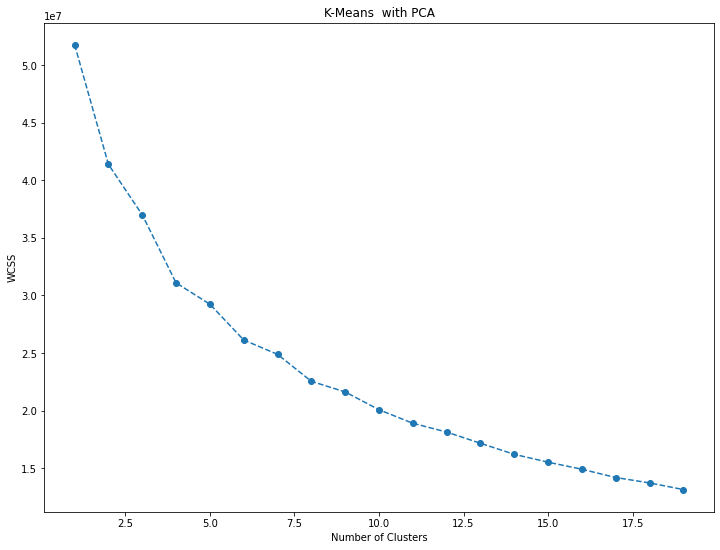

In [77]:
plt.figure(figsize=(12,9))
plt.plot(range(1,20),wcss_pca, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means  with PCA")
plt.show()

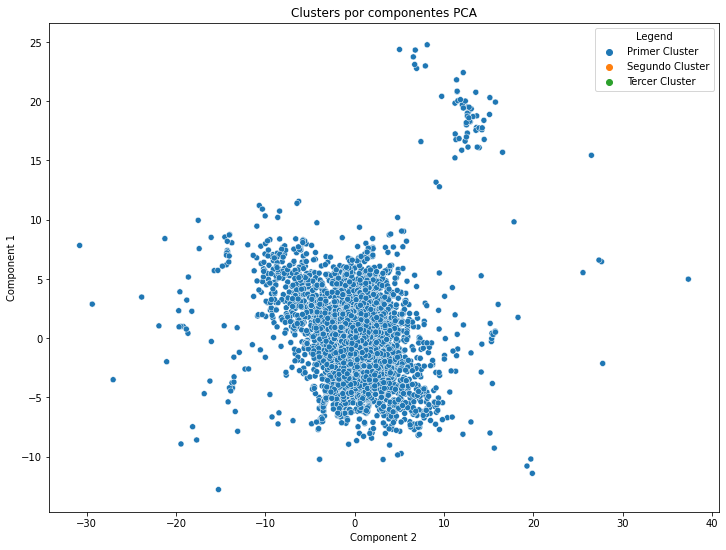

In [111]:
#K-Means clustering with PCA results
kmeans_pca=KMeans(n_clusters= 3, init='k-means++', random_state=0)
kmeans_pca.fit(pca_res)

df_segm_pca_kmeans= pd.concat([df_clusters.reset_index(drop=True), pd.DataFrame(pca_res)], axis=1)
df_segm_pca_kmeans.columns.values[-2: ]= ['Component 1','Component 2']
df_segm_pca_kmeans['Segment k-means PCA']= kmeans_pca.labels_
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()

df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment k-means PCA'].map({0:'Primer Cluster',1:'Segundo Cluster',2: 'Tercer Cluster', 3: 'Cuarto Cluster', 4: 'Quinto Cluster', 5:'Sexto Cluster',6:'Séptimo Cluster',7: 'Octavo Cluster', 8: 'Noveno Cluster'})
plt.figure(figsize=(12,9))
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'])
#sns.scatterplot(x_axis, y_axis, hue= df_segm_pca_kmeans['Legend'], palette=['g','r','c','m'])
plt.title('Clusters por componentes PCA')
plt.show()

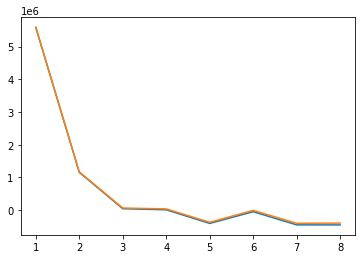

In [81]:
#demora muchísimo en correr, OMITIR con dataset completo
#prueba con mezcla de gaussianas aplicado sobre datos transformados con PCA

bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(pca_res)
    bic.append(gm.bic(pca_res))
    aic.append(gm.aic(pca_res))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.show()

In [112]:
gmm_pca = GaussianMixture(n_components = 5, random_state =0) 
gmm_pca.fit(pca_res)

GaussianMixture(n_components=5, random_state=0)

In [105]:
print(gmm_pca.means_)

[[  -0.42562286    0.19825791    0.04636493    0.12671117    0.06682538
     0.07078415   -0.00596552   -0.08875254   -0.02303804    0.00202915
    -0.03411206   -0.01178387   -0.00932759    0.02326966    0.00628968
     0.01140208   -0.00728663   -0.01783313   -0.00859287    0.00654764
     0.01277044    0.00055697   -0.00496801   -0.00167954   -0.00110509
    -0.00474451    0.00155639    0.00073315   -0.00079582    0.00211542
    -0.00223359   -0.00070561   -0.00403148   -0.00067088    0.00029252
     0.01119621    0.01613236    0.00649581   -0.00213485    0.00151991
     0.00395443    0.00419132    0.00190156    0.00195513   -0.00160723
    -0.00271901   -0.00188333   -0.00049452   -0.00438011   -0.00100842
    -0.00170432   -0.00265095   -0.00209254   -0.00088276   -0.00044317
     0.00032727   -0.00384949    0.00010131    0.00010098   -0.00144882]
 [1549.36587053 -697.20073742 1260.76364483  208.42359925  208.77674735
   627.71916465  416.81913485  208.55116182  219.47644406   13.

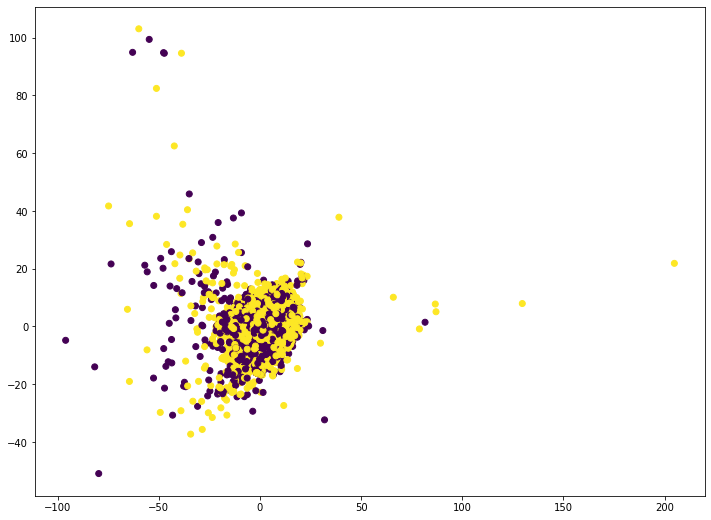

In [121]:
from scipy.stats import multivariate_normal as mvn

predicted_values = gmm_pca.predict(pca_res)
    
plt.figure(figsize = (12,9))
plt.scatter(pca_res[:, 10], pca_res[:, 23],c=y , cmap='viridis')

#plt.scatter(centers[:, 0], centers[:, 1],c='black', alpha=0.6);

En el grafico anterior se observan los datos transformados con PCA, y cada color corresponde a una clase (noticias y opinión)

In [122]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

output_notebook()
plot_pca = bp.figure(plot_width=900, plot_height=700, title="Clusters con datos en PCA",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_pca.scatter(x=pca_res[:,10], y=pca_res[:,23], 
                    color=colormap[predicted_values][:23000]) 
                   
hover = plot_pca.select(dict(type=HoverTool))

show(plot_pca)

Loading BokehJS ...

Podemos observar que utilizando transformacion con PCA los datos se separan mejor.

In [123]:
#Gaussian Mixture clustering con t-sne


colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

plot_gmm = bp.figure(plot_width=800, plot_height=700, title="Sentiment sobre distribucion sin PCA (Clusters con GMM)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_gmm.scatter(x=tsne_kmeans[:,0], y=tsne_kmeans[:,1], 
                    color=colormap[predicted_values][:23000]) 
                   
hover = plot_gmm.select(dict(type=HoverTool))

show(plot_gmm)

In [116]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_gmm = tsne_model.fit_transform(pca_res)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22151 samples in 0.000s...
[t-SNE] Computed neighbors for 22151 samples in 20.919s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22151
[t-SNE] Computed conditional probabilities for sample 2000 / 22151
[t-SNE] Computed conditional probabilities for sample 3000 / 22151
[t-SNE] Computed conditional probabilities for sample 4000 / 22151
[t-SNE] Computed conditional probabilities for sample 5000 / 22151
[t-SNE] Computed conditional probabilities for sample 6000 / 22151
[t-SNE] Computed conditional probabilities for sample 7000 / 22151
[t-SNE] Computed conditional probabilities for sample 8000 / 22151
[t-SNE] Computed conditional probabilities for sample 9000 / 22151
[t-SNE] Computed conditional probabilities for sample 10000 / 22151
[t-SNE] Computed conditional probabilities for sample 11000 / 22151
[t-SNE] Computed conditional probabilities for sample 12000 / 22151
[t-SNE] Computed conditional probabilities for sa

In [124]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

plot_gmm = bp.figure(plot_width=800, plot_height=700, title="Sentiment_PCA (GMM Clusters)",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_gmm.scatter(x=tsne_gmm[:,0], y=tsne_gmm[:,1], 
                    color=colormap[predicted_values][:23000]) 
                   
hover = plot_gmm.select(dict(type=HoverTool))

show(plot_gmm)

Parece que los clusters se separan mejor con los datos originales (sin procesamiento PCA) ya que en este último caso, uno de los clusters absorve casi todas las observaciones
